In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize data to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [3]:
# Parameters
input_dim = x_train.shape[1]
encoding_dim = 32  # Compressed representation dimension

# Encoder model
input_layer = Input(shape=(input_dim,))
encoded_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder model
decoded_layer = Dense(input_dim, activation='sigmoid')(encoded_layer)

# Full autoencoder model
autoencoder = Model(input_layer, decoded_layer)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


2023-10-10 15:29:46.786238: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-10-10 15:29:46.787487: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-10-10 15:29:46.788524: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-10-10 15:29:46.789561: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


In [5]:
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)


Epoch 1/50
235/235 [==============================] - 3s 7ms/step - loss: 0.2758 - val_loss: 0.1836
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1672 - val_loss: 0.1519
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1433 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1281 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1184 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1114 - val_loss: 0.1072
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1064 - val_loss: 0.1034
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1027 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0999 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0979 - val_loss: 0.0958

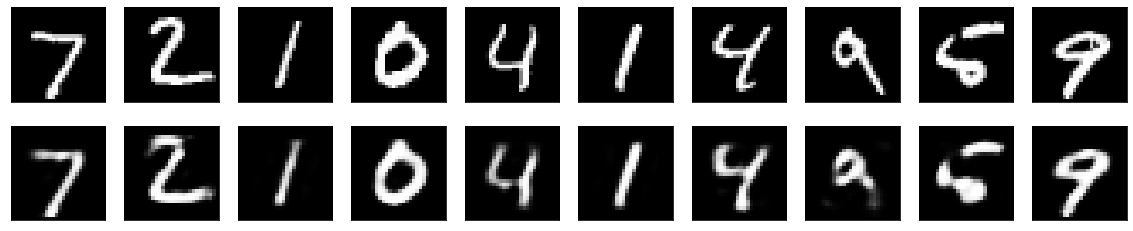

In [6]:
# Use the autoencoder to reconstruct test images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruction of the image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [24]:
# Obtain the reconstruction of the test data (normal + anomalies)
decoded_data = autoencoder.predict(x_test)

mse = np.mean(np.power((decoded_data-x_test),2),axis=1)
# Plot the MSE


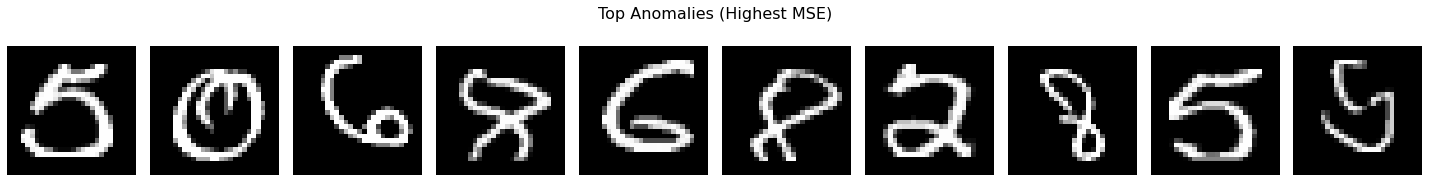

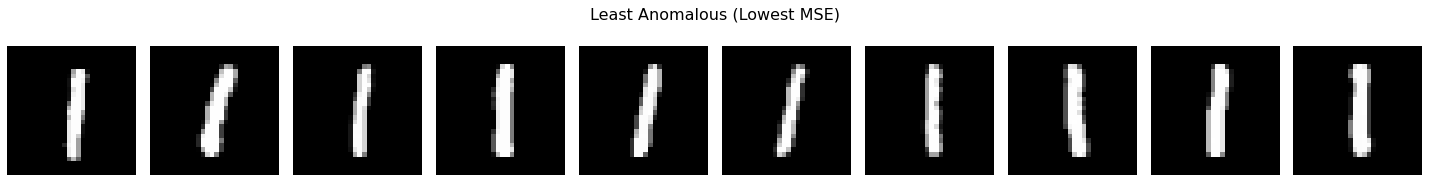

In [25]:
sorted_indices = mse.argsort()[::-1]
# Display some samples with highest MSE (biggest anomalies)
plt.figure(figsize=(20, 4))
for i, index in enumerate(sorted_indices[:10]):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.suptitle("Top Anomalies (Highest MSE)", size=16, y=1.1)
plt.show()

# Display some samples with lowest MSE (least anomalies)
plt.figure(figsize=(20, 4))
for i, index in enumerate(sorted_indices[-10:]):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.suptitle("Least Anomalous (Lowest MSE)", size=16, y=1.1)
plt.show()
